<a href="https://colab.research.google.com/github/garfield-gray/MachineLearning/blob/main/pytorch/0_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [8]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [4]:
t = torch.tensor([[1,2,3],[4,5,6]])
t.shape

torch.Size([2, 3])

In [5]:
im = torch.rand((224,224,3))
z = torch.zeros_like(im)
o = torch.ones_like(im)

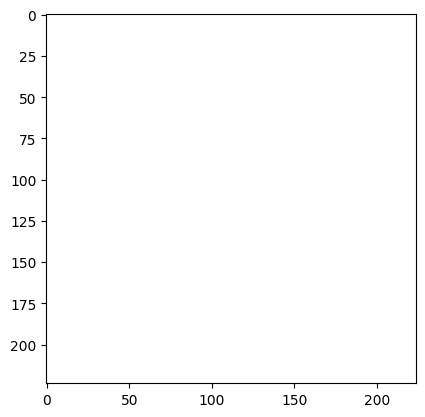

In [6]:
# prompt: show im as image

plt.imshow(o)
plt.show()


In [7]:
%%time
torch.rand((10000,10000))

CPU times: user 691 ms, sys: 242 ms, total: 932 ms
Wall time: 929 ms


tensor([[0.3923, 0.0651, 0.0341,  ..., 0.7797, 0.9145, 0.4684],
        [0.5350, 0.4696, 0.5047,  ..., 0.6343, 0.8824, 0.7828],
        [0.1653, 0.1967, 0.3259,  ..., 0.0877, 0.8326, 0.3359],
        ...,
        [0.9643, 0.9055, 0.5750,  ..., 0.4134, 0.2330, 0.5850],
        [0.0739, 0.5736, 0.6227,  ..., 0.0067, 0.4799, 0.7358],
        [0.5510, 0.1237, 0.7710,  ..., 0.2547, 0.5931, 0.4473]])

In [16]:
x = torch.arange(10000).reshape(100,100)
y = np.arange(10000).reshape(100,100)


In [17]:
%%time
x@x
1

CPU times: user 3.93 ms, sys: 0 ns, total: 3.93 ms
Wall time: 2.99 ms


1

In [18]:
%%time
y@y
1

CPU times: user 2.89 ms, sys: 0 ns, total: 2.89 ms
Wall time: 1.71 ms


1

In [20]:
%%time
z = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    for k in range(100):
      z[i,j] += x[i,k] * x[k,j]


CPU times: user 34.1 s, sys: 31.1 ms, total: 34.1 s
Wall time: 34.8 s


In [28]:
x = torch.arange(12).reshape(3,4)
x = x.unsqueeze(dim=0)
x.shape

torch.Size([1, 3, 4])

In [29]:
x.squeeze()

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [32]:
x.permute(0,2,1)

tensor([[[ 0,  4,  8],
         [ 1,  5,  9],
         [ 2,  6, 10],
         [ 3,  7, 11]]])